# import required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import re

import warnings
warnings.filterwarnings('ignore')

# importing the Data

In [2]:
car_price = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data preprocessing

In [4]:
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
car_price.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
car_price.duplicated().sum()

0

In [7]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
numerical_columns =car_price.select_dtypes(include=['number']).columns
numerical_columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Handling Outliers

car_ID


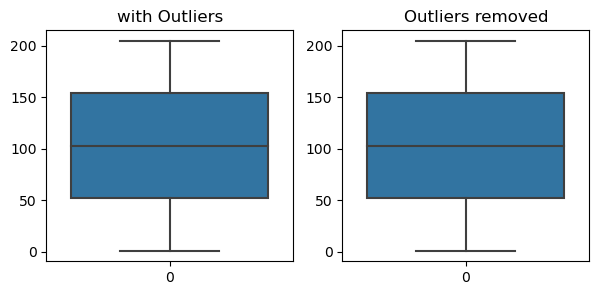

symboling


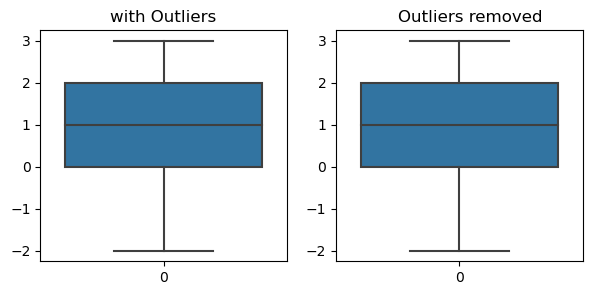

wheelbase


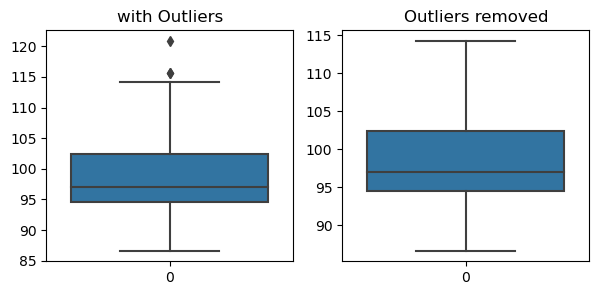

carlength


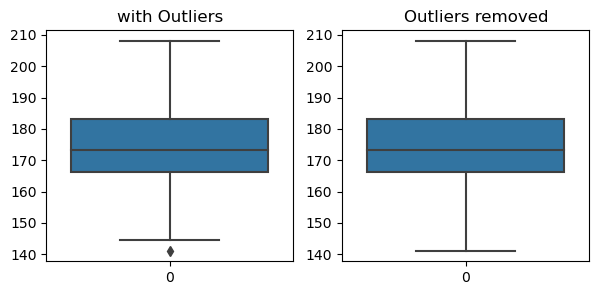

carwidth


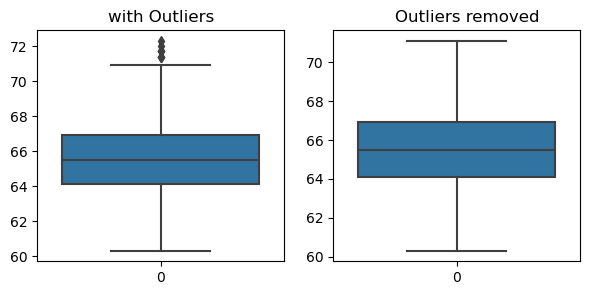

carheight


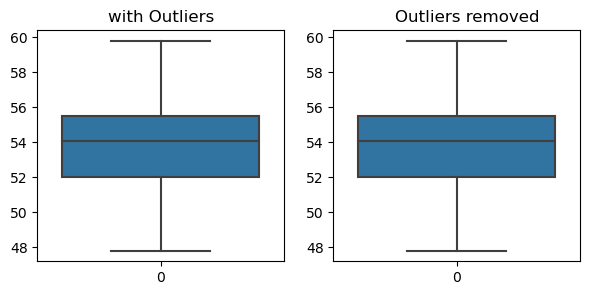

curbweight


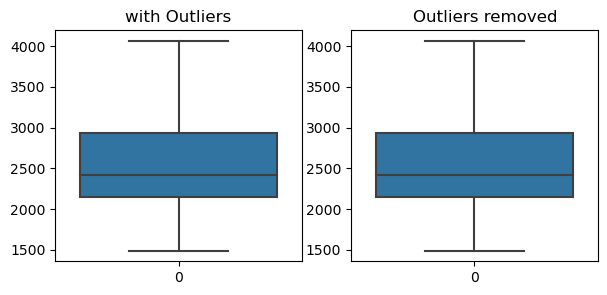

enginesize


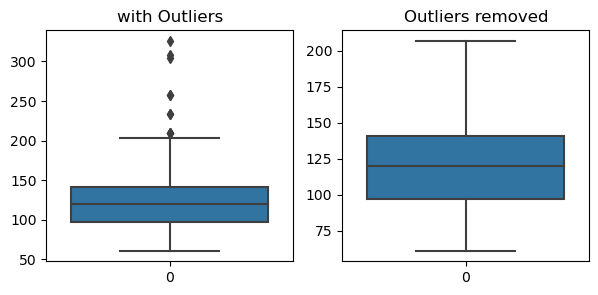

boreratio


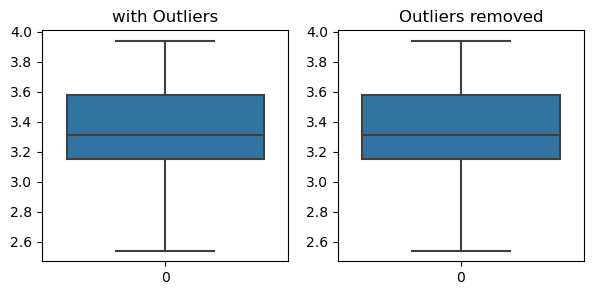

stroke


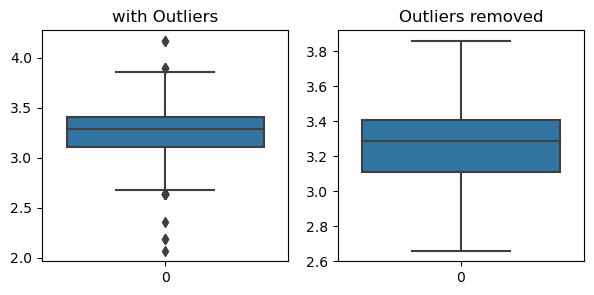

compressionratio


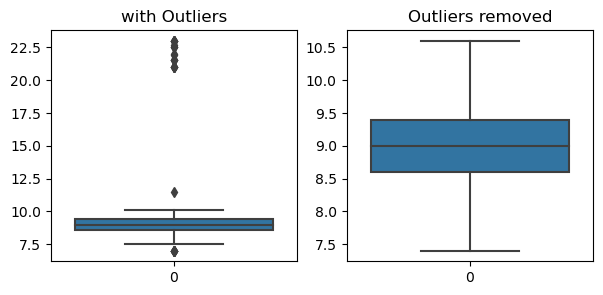

horsepower


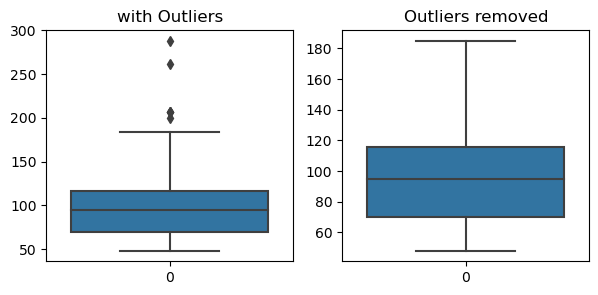

peakrpm


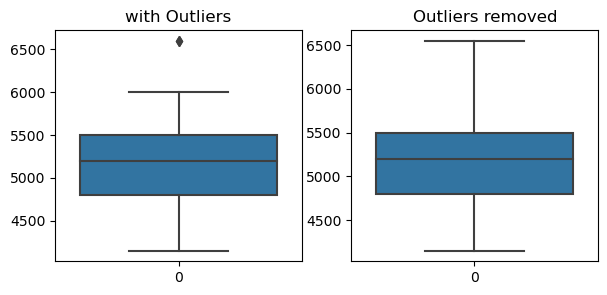

citympg


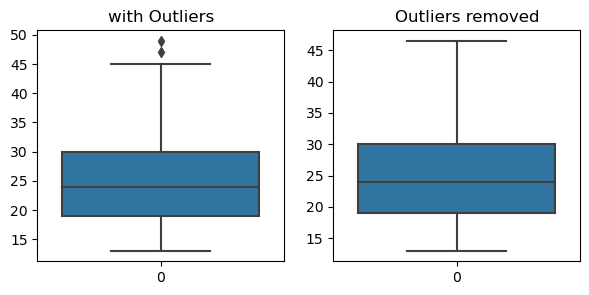

highwaympg


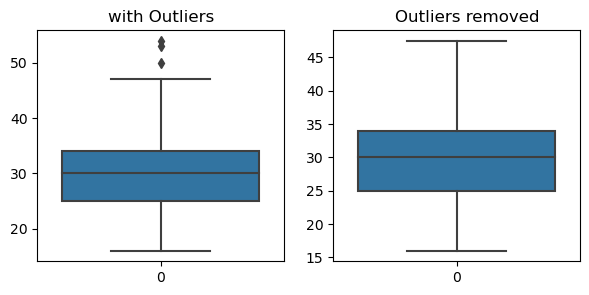

price


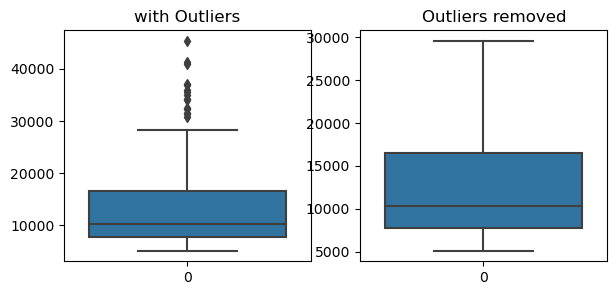

In [9]:
for i in numerical_columns:
    print(i)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
    sns.boxplot(data=car_price[i], ax=axes[0])
    axes[0].set_title('with Outliers')
    
    def outliers(col):
        q1 = car_price[col].quantile(0.25)
        q3 = car_price[col].quantile(0.75)
        iqr = q3-q1
        pos_outlier = q3 + 1.5 * iqr
        neg_outlier = q1 - 1.5 * iqr
        car_price[col] = np.where(car_price[col] > pos_outlier,pos_outlier,
                                     np.where(car_price[col] < neg_outlier, neg_outlier,
                                            car_price[col]) )

    outliers(i)

# Boxplot without outliers
    sns.boxplot(data=car_price[i], ax=axes[1], sym='')
    axes[1].set_title('    Outliers removed')

    plt.show()

In [10]:
def unique_value(col):
    print(col)
    print('***************')
    print(car_price[col].unique())
    print('')
    
for i in list(car_price.select_dtypes(exclude=['float','int']).columns)[0:]:
    unique_value(i)

CarName
***************
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick sky

In [11]:
car_list=car_price['CarName'].unique()
car_brands = [car.split(' ')[0] for car in car_list]
print(car_brands)

['alfa-romero', 'alfa-romero', 'alfa-romero', 'audi', 'audi', 'audi', 'audi', 'audi', 'audi', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'bmw', 'chevrolet', 'chevrolet', 'chevrolet', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'isuzu', 'isuzu', 'isuzu', 'jaguar', 'jaguar', 'jaguar', 'maxda', 'maxda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'buick', 'buick', 'buick', 'buick', 'buick', 'buick', 'buick', 'buick', 'mercury', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi', 'Nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'nissan', 'peugeot', 'peugeot', 'peugeot', 'peugeot', 'peugeot', 'plymouth', 'plymouth', 'plymouth', 'plymouth', 'plymouth', 'plymouth', 'porsche', 'porcshce', 'porsche', 'porsche', 'ren

In [12]:
unique_values = list(set(car_brands))
print(unique_values)

['chevrolet', 'maxda', 'subaru', 'renault', 'bmw', 'porsche', 'alfa-romero', 'mitsubishi', 'porcshce', 'mazda', 'mercury', 'volvo', 'vokswagen', 'toyota', 'plymouth', 'vw', 'Nissan', 'saab', 'peugeot', 'audi', 'dodge', 'jaguar', 'honda', 'buick', 'nissan', 'isuzu', 'volkswagen', 'toyouta']


# Finding Correlation

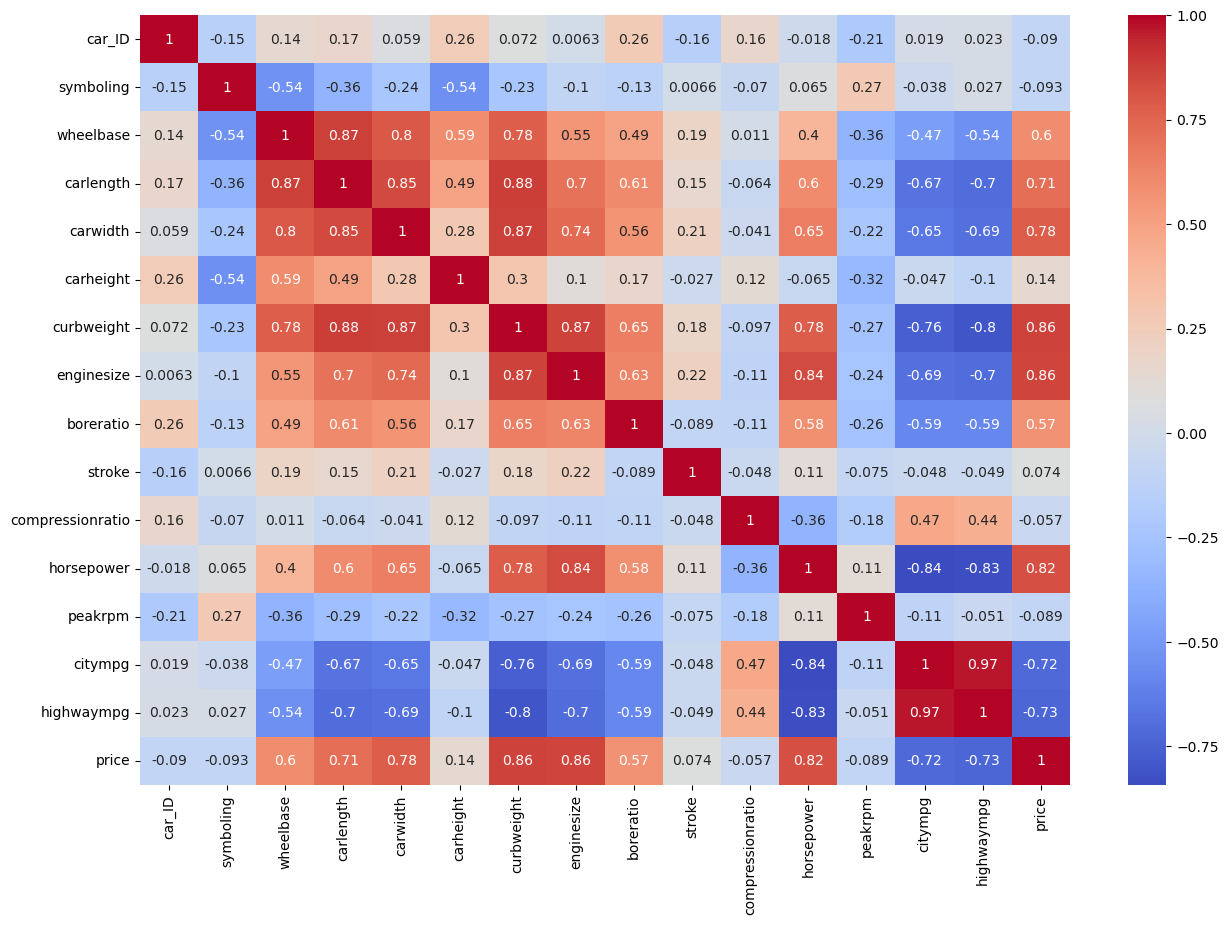

In [13]:
plt.figure(figsize=(15,10))
corr = car_price[numerical_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Encoding

In [14]:
categorical_columns = car_price.select_dtypes(include=object).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    car_price[column] = label_encoder.fit_transform(car_price[column])

scaler = StandardScaler()
car_price[numerical_columns] = scaler.fit_transform(car_price[numerical_columns])

# Train and Test Split

In [15]:
X = car_price.drop(['price', 'CarName'], axis=1) 
y = car_price['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(153, 24) (52, 24) (153,) (52,)


# Building Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [18]:
lm.score(x_train, y_train)

0.9147112666490638

In [19]:
y_pred = lm.predict(x_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.811205112500399
Mean Squared Error: 0.16747257388287745


# ols method

In [21]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [22]:
reg_model = smf.OLS(endog = y_train, exog=x_train).fit()

In [23]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              56.95
Date:                Wed, 06 Dec 2023   Prob (F-statistic):                    4.50e-57
Time:                        20:03:38   Log-Likelihood:                         -31.397
No. Observations:                 153   AIC:                                      110.8
Df Residuals:                     129   BIC:                                      183.5
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
car_ID              -0.1350      0.031     -4.386      0.000      -0.196      -0.074
symboling            0.0441      0.044      0.999      0.320      -0.043       0.131
fueltype            -0.0662      0.148     -0.447      0.656      -0.360       0.227
aspiration          -0.0134      0.110     -0.122      0.903      -0.232       0.205
doornumber          -0.1423      0.091     -1.557      0.122      -0.323       0.039
carbody             -0.0815      0.046     -1.756      0.081      -0.173       0.010
drivewheel           0.2819      0.074      3.808      0.000       0.135       0.428
enginelocation       1.2725      0.264      4.813      0.000       0.749       1.796
wheelbase            0.0456      0.088      0.518      0.605      -0.128       0.220
carlength           -0.0704      0.093     -0.761      0.448      -0.254       0.113
carwidth             0.2353      0.069      3.426      0.001       0.099       0.371
carheight            0.0533      0.044      1.214      0.227      -0.034       0.140
curbweight           0.3391      0.109      3.119      0.002       0.124       0.554
enginetype           0.0381      0.029      1.292      0.199      -0.020       0.096
cylindernumber      -0.0879      0.049     -1.785      0.077      -0.185       0.010
enginesize           0.0836      0.102      0.818      0.415      -0.119       0.286
fuelsystem           0.0028      0.020      0.141      0.888      -0.037       0.043
boreratio           -0.1719      0.047     -3.639      0.000      -0.265      -0.078
stroke              -0.1009      0.034     -2.927      0.004      -0.169      -0.033
compressionratio     0.1147      0.050      2.286      0.024       0.015       0.214
horsepower           0.3647      0.103      3.552      0.001       0.162       0.568
peakrpm             -0.0082      0.046     -0.176      0.860      -0.100       0.084
citympg             -0.2022      0.144     -1.404      0.163      -0.487       0.083
highwaympg           0.1700      0.139      1.220      0.225      -0.106       0.446
==============================================================================
Omnibus:                        3.059   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.217   Jarque-Bera (JB):                3.016
Skew:                          -0.130   Prob(JB):                        0.221
Kurtosis:                       3.637   Cond. No.                         63.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Lasso regularization

In [24]:
from sklearn.linear_model import Lasso 
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
print("Lasso Model :", (lasso.coef_))

Lasso Model : [-0.01122002  0.         -0.         -0.         -0.         -0.
  0.          0.          0.          0.          0.16191883  0.
  0.21368857  0.          0.          0.23508076  0.          0.
 -0.00465022  0.02108939  0.27699019  0.         -0.         -0.        ]


In [25]:
y_pred_train_lasso = lasso.predict(x_train)
y_pred_test_lasso = lasso.predict(x_test)

In [26]:
print("Training Accuracy :", r2_score(y_train, y_pred_train_lasso))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_lasso))

Training Accuracy : 0.8122353228881479

Test Accuracy : 0.8438095695530451


In [27]:
# Part 2 : Ridge Regression (L2- Regularization)
# closure to zero but not exact zero
# penalty - 0.3
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.3)
ridge.fit(x_train, y_train)
print("Ridge Model :", (ridge.coef_))

Ridge Model : [-0.12681145  0.04700021 -0.28260993 -0.09038291 -0.17851067 -0.1119754
  0.23937355  1.02613235  0.0528645  -0.06500153  0.21985275  0.04654629
  0.30633901  0.02839857 -0.0935127   0.08797257 -0.0094005  -0.1605917
 -0.11053408  0.09377869  0.40934991  0.00859067 -0.1934089   0.13577635]


In [28]:
y_pred_train_ridge = ridge.predict(x_train)
y_pred_test_ridge = ridge.predict(x_test)

In [29]:
print("Training Accuracy :", r2_score(y_train, y_pred_train_ridge))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_ridge))

Training Accuracy : 0.9142724965562357

Test Accuracy : 0.8135911900533563


# Elastic net

In [30]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.3, l1_ratio=0.1)
elastic.fit(x_train, y_train)

ElasticNet(alpha=0.3, l1_ratio=0.1)

In [31]:
y_pred_train_elastic = elastic.predict(x_train)
y_pred_test_elastic = elastic.predict(x_test)

In [32]:
print("Training Accuracy :", r2_score(y_train, y_pred_train_elastic))
print()
print("Test Accuracy :", r2_score(y_test, y_pred_test_elastic))

Training Accuracy : 0.8495242350383081

Test Accuracy : 0.8560946047809289


In [33]:
from sklearn.model_selection import train_test_split
sc = StandardScaler()
sc_x = sc.fit_transform(X) 
x_train, x_test, y_train, y_test = train_test_split(sc_x, y, test_size=0.25, random_state=101)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(153, 24) (52, 24) (153,) (52,)


# performance matrix

In [39]:
from sklearn import metrics
print("MAE :", metrics.mean_absolute_error(y_test, y_pred))
print("MAPE :", metrics.mean_absolute_error(y_test, y_pred)/100)
print("MSE :", metrics.mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE : 0.31268349981908583
MAPE : 0.0031268349981908583
MSE : 0.16747257388287745
RMSE : 0.4092341308870479


# Gradient Descent

In [34]:
from sklearn.linear_model import SGDRegressor
gd_model = SGDRegressor()
gd_model.fit(x_train, y_train)
y_pred_gd_train = gd_model.predict(x_train)

y_pred_gd_test = gd_model.predict(x_test)

print("GD Trainging Accuracy :", r2_score(y_train, y_pred_gd_train))

print()

print("GD Test Accuracy :", r2_score(y_test, y_pred_gd_test))

GD Trainging Accuracy : 0.9053520122518992

GD Test Accuracy : 0.8514768054862887


# test for autocorrelation

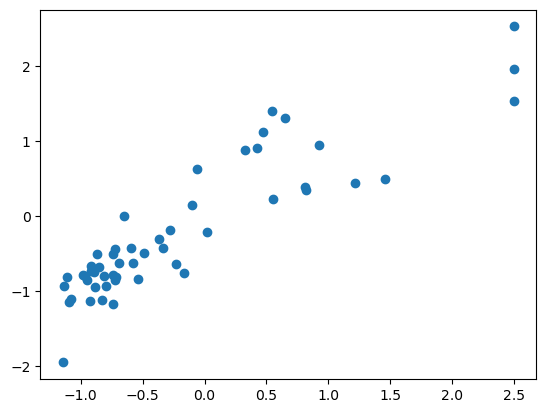

In [36]:
plt.scatter(y_test, y_pred)

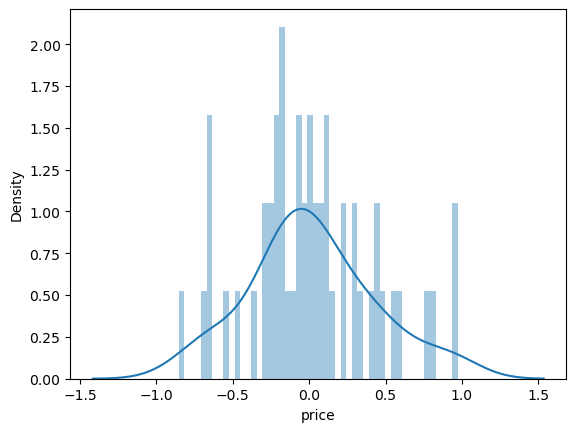

In [37]:
sns.distplot((y_test - y_pred), bins=50)
plt.show()